# Презентационный проект по Методу Главных Компонент.

**Цель.** Выяснить с помощью метода главный компонент, какие написаны от руки цифры наиболее сильно отличаются друг от друга.

С помощью Метода Главных Компонент нужно выяснить, какие цифры легче отличимы от других цифр.

Признаки Х == пиксели.


**Импорт библиотек.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Импорт DataFrame.**

In [2]:
digits = pd.read_csv('PCA_Project_Data.csv')
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**Удаляем Целевую переменную.**

In [3]:
pixels = digits.drop('number_label',axis=1)

**Преобразуем одно наблюдение в изображение.**

Получили 64 значения.


In [4]:
single_image = pixels.iloc[0]

In [5]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [6]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
single_image.to_numpy().shape

(64,)

In [8]:
number = single_image.to_numpy().reshape(8,8)

<Axes: >

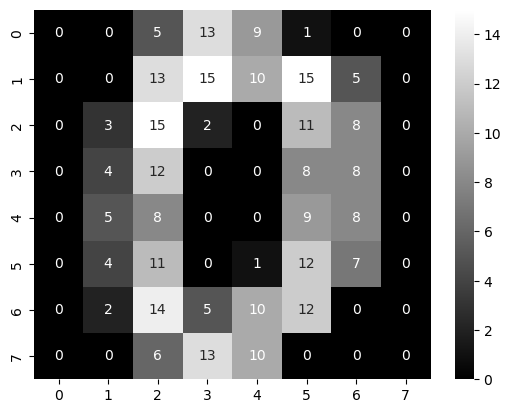

In [9]:
sns.heatmap(single_image.to_numpy().reshape(8,8),annot=True,cmap='gray')

**Масштабируем данные.**

scaled_pixels == смаштабированный DataFrame pixels

Создали 3 главные компоненты.

Суммарно три компонента объясняют 30% данных.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_pixels = scaler.fit_transform(pixels)

In [13]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca_model = PCA(n_components=3)

In [16]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [17]:
np.sum(pca_model.explained_variance_ratio_)

0.3003938536155092

**Создаём 3D график для 3-х компонентов.**

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca_model = PCA(n_components=3)

In [20]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [21]:
from mpl_toolkits import mplot3d

In [29]:
# %matplotlib notebook

In [30]:
'''plt.figure(figsize=(5,5),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);
plt.legend(loc=(1.05,0))'''


"plt.figure(figsize=(5,5),dpi=150)\nax = plt.axes(projection='3d')\nax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);\nplt.legend(loc=(1.05,0))"